In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [124]:
prefixes = ['Control', 'Data Parallel', 'Execution', 'Memory', 'Store Intense']

In [125]:
df1 = pd.read_csv("perf_microbench.csv")
df2 = pd.read_csv("gem5runs_microbench.csv")
df = pd.merge(df1, df2, on = "Benchmark", how = "inner")

# renaming columns
df.rename(columns={"Instructions_x": "Instructions_perf", "Cycles_x": "Cycles_perf", "Seconds_x": "Seconds_perf", "IPC_x":"IPC_perf", "IPS_x":"IPS_perf", "Instructions_y":"Instructions_gem5","Cycles_y": "Cycles_gem5", "Seconds_y": "Seconds_gem5", "IPC_y": "IPC_gem5", "IPS_y": "IPS_gem5"},inplace=True)

# calculating values of diff
df["Instructions_diff"] = (df["Instructions_gem5"] - df["Instructions_perf"]) / 1000000
df["Cycles_diff"] = (df["Cycles_gem5"] - df["Cycles_perf"]) / 1000000
df["IPS_diff"] = (df["IPS_gem5"] - df["IPS_perf"]) / 1000000000
df["IPC_diff"] = df["IPC_gem5"] - df["IPC_perf"]
df["Seconds_diff"] = df["Seconds_gem5"] - df["Seconds_perf"]

# calculating values of % diff
df["Instructions_%diff"] = (df["Instructions_gem5"] - df["Instructions_perf"]) / df["Instructions_perf"]
df["Cycles_%diff"] = (df["Cycles_gem5"] - df["Cycles_perf"]) / df["Cycles_perf"]
df["IPS_%diff"] = (df["IPS_gem5"] - df["IPS_perf"]) / df["IPS_perf"]
df["IPC_%diff"] = (df["IPC_gem5"] - df["IPC_perf"]) / df["IPC_perf"]
df["Seconds_%diff"] = (df["Seconds_gem5"] - df["Seconds_perf"]) / df["Seconds_perf"]

In [126]:
def percentageplot(stat, ylim=None):
    plt.figure(figsize=(8,4))
    label = stat+"_%diff"
    sort = df.sort_values(label, ascending = True).reset_index(drop=True)
    color = ""
    annot_offset_pos = 0
    annot_offset_neg = 0

    for b, bench in enumerate(sort["Benchmark"]):
        for p in prefixes:
            if bench.startswith(p[0]):
                color = "C" + str(prefixes.index(p))
        if ylim and sort[label][b] < ylim[0]:
            plt.annotate(str(round(sort[label][b], 1)), (b-1,ylim[0]+annot_offset_neg))
            annot_offset_neg -= ylim[0]/10.0
            # annotate the value to the graph
        elif ylim and sort[label][b] > ylim[1]:
            plt.annotate(str(round(sort[label][b], 1)), (b-1,ylim[1]+annot_offset_pos))
            annot_offset_pos -= ylim[0]/10.0
        plt.bar(b, sort[label][b], color = color)
        

    for i, pfrm in enumerate(prefixes):
        plt.bar(0, 0, color="C" + str(i), label=pfrm)
    
    plt.xticks((np.arange(len(sort))), sort["Benchmark"], rotation=80, ha="center", fontsize=14)

    plt.xlabel("Benchmarks")
    plt.ylabel(label)
    plt.axhline(y=0)
    plt.title("Relative difference gem5 compared to perf for " + stat)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.ylim(ylim)
    plt.show()

In [127]:
def absoluteplot(stat, ylim=None):
    plt.figure(figsize=(8,4))
    label = stat+"_diff"
    sort = df.sort_values(label, ascending = True).reset_index(drop=True)
    color = ""
    annot_offset_pos = 0
    annot_offset_neg = 0

    for b, bench in enumerate(sort["Benchmark"]):
        for p in prefixes:
            if bench.startswith(p[0]):
                color = "C" + str(prefixes.index(p))
        if ylim and sort[label][b] < ylim[0]:
            plt.annotate(str(round(sort[label][b], 1)), (b-1,ylim[0]+annot_offset_neg))
            annot_offset_neg -= ylim[0]/10.0
            # annotate the value to the graph
        elif ylim and sort[label][b] > ylim[1]:
            plt.annotate(str(round(sort[label][b], 1)), (b-1,ylim[1]+annot_offset_pos))
            annot_offset_pos -= ylim[0]/10.0
        plt.bar(b, sort[label][b], color = color)
        

    for i, pfrm in enumerate(prefixes):
        plt.bar(0, 0, color="C" + str(i), label=pfrm)
    
    plt.xticks((np.arange(len(sort))), sort["Benchmark"], rotation=80, ha="center", fontsize=14)

    plt.xlabel("Benchmarks")
    plt.ylabel(label)
    plt.axhline(y=0)
    plt.title("Absolute difference gem5 compared to perf for " + stat)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.ylim(ylim)
    plt.show()

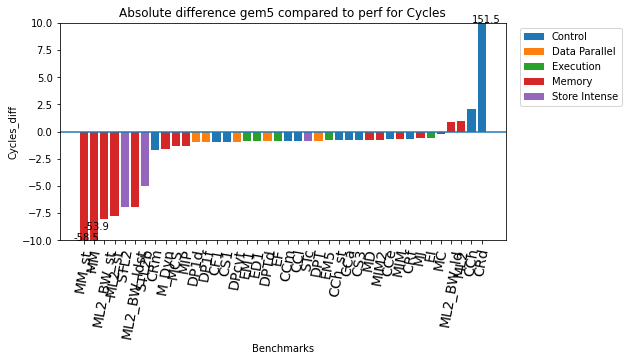

In [128]:
absoluteplot("Cycles", (-10,10))

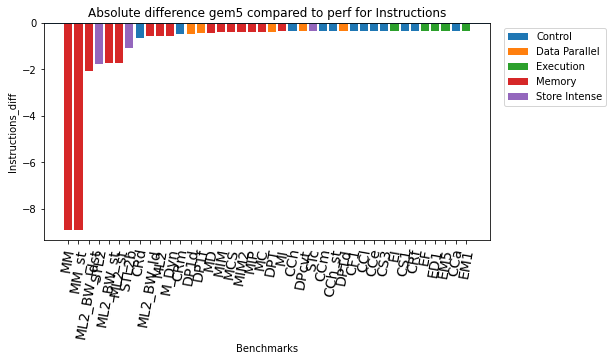

In [129]:
absoluteplot("Instructions")

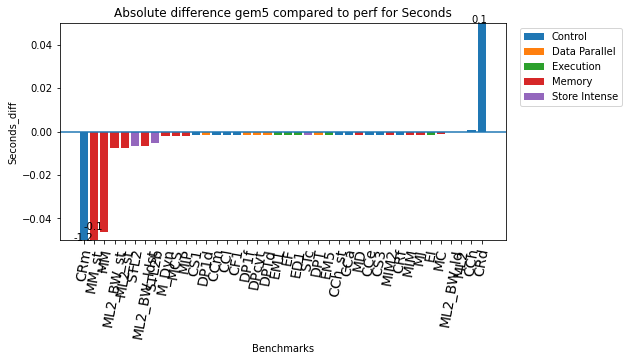

In [130]:
absoluteplot("Seconds", (-0.05, 0.05))

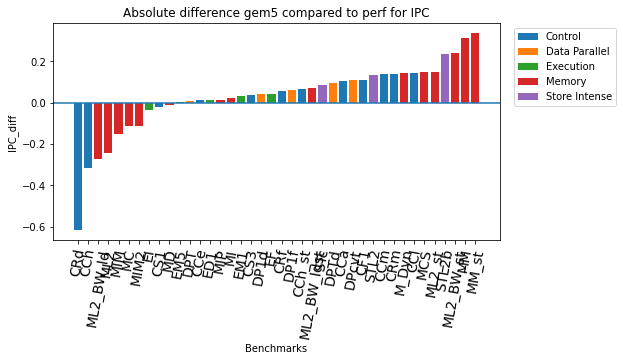

In [131]:
absoluteplot("IPC")

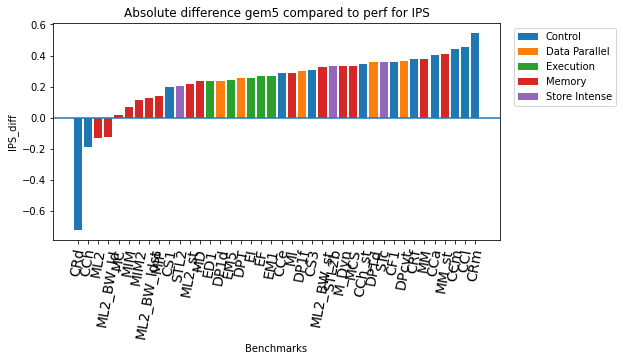

In [132]:
absoluteplot("IPS")

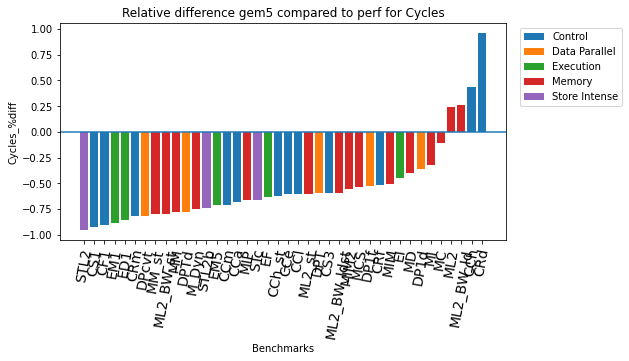

In [133]:
percentageplot("Cycles")

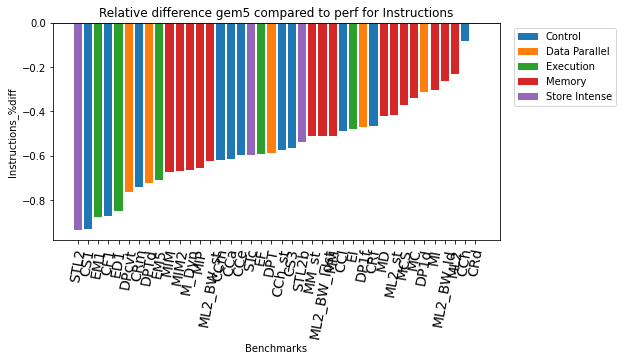

In [134]:
percentageplot("Instructions")

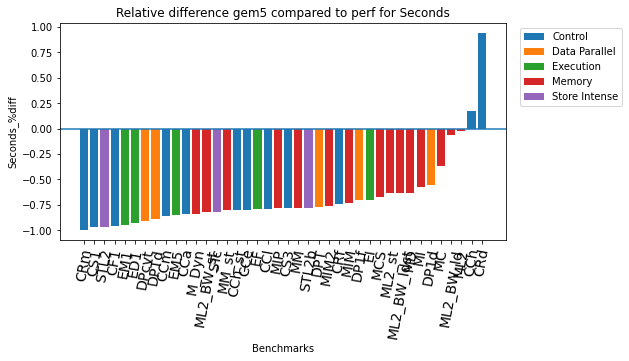

In [135]:
percentageplot("Seconds")

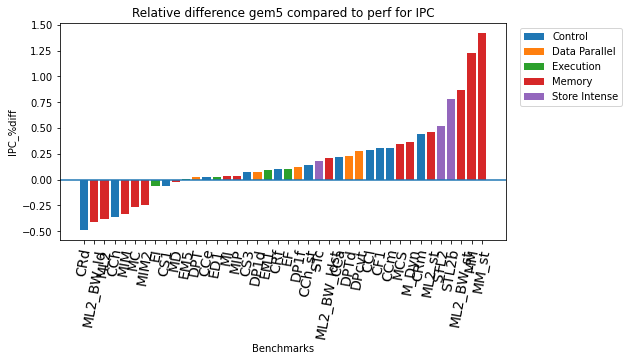

In [136]:
percentageplot("IPC")

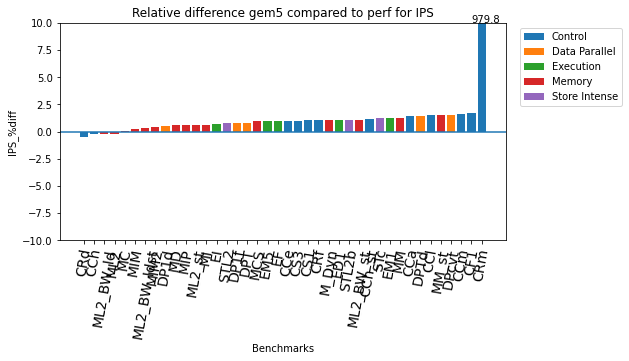

In [137]:
percentageplot("IPS", (-10,10))